# K-Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# summary
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<Axes: xlabel='type', ylabel='Count'>

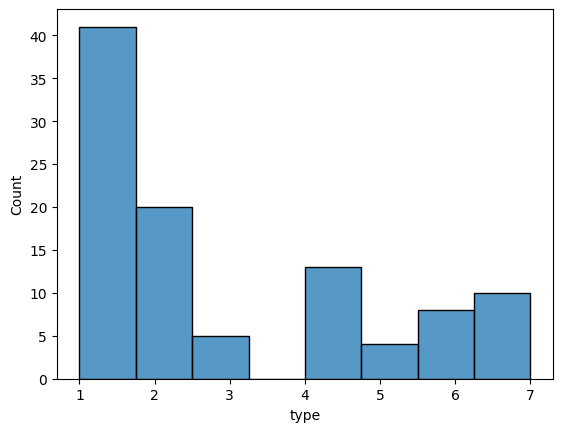

In [12]:
# duplicates
# df.duplicated().sum()
# No duplicates

# histogram for type
sns.histplot(df['type'])

<Axes: >

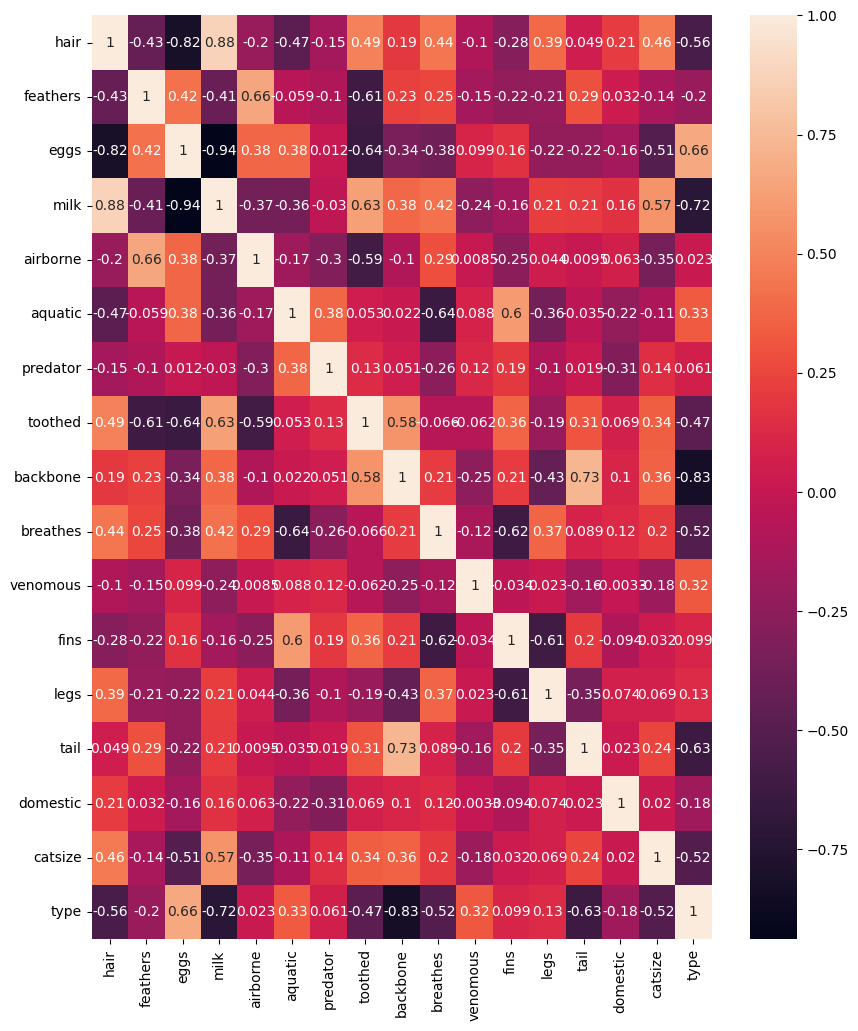

In [16]:
# correlation heatmap
df1 = df.drop('animal name', axis=1)
plt.figure(figsize=(10,12))
sns.heatmap(df1.corr(), annot=True)

In [17]:
# split data
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [18]:
# split 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# all features are in same scale
# applying with differenet K values and different distance metric
k_scores = []
knn = KNeighborsClassifier()
param_grid = {'metric': ['euclidean', 'manhattan']}
for k in range(1, 21):
    knn.n_neighbors = k
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    k_scores.append(accuracy_score(y_test, y_pred))
    print(f'K={k}, Accuracy={accuracy_score(y_test, y_pred)}')

K=1, Accuracy=1.0
K=2, Accuracy=1.0
K=3, Accuracy=0.9523809523809523
K=4, Accuracy=0.9523809523809523
K=5, Accuracy=0.9523809523809523
K=6, Accuracy=0.9047619047619048
K=7, Accuracy=0.8571428571428571
K=8, Accuracy=0.8571428571428571
K=9, Accuracy=0.8571428571428571
K=10, Accuracy=0.8571428571428571
K=11, Accuracy=0.8571428571428571
K=12, Accuracy=0.8571428571428571
K=13, Accuracy=0.8571428571428571
K=14, Accuracy=0.8095238095238095
K=15, Accuracy=0.8095238095238095
K=16, Accuracy=0.8095238095238095
K=17, Accuracy=0.8095238095238095
K=18, Accuracy=0.8095238095238095
K=19, Accuracy=0.7619047619047619
K=20, Accuracy=0.7619047619047619


**Interview Questions:**

**1. What are the key hyperparameters in KNN?**


*   K.
*   Distance parameter.
*   Weights.


**2. What distance metrics can be used in KNN?**

*   Eucledian.
*   Manhattan.

